In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

fl = pd.read_csv('customer_acquisition_data.csv')
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [41]:
fl.head(15)

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419
5,6,paid advertising,30.450327,0.016341,3856
6,7,social media,9.546326,0.167592,1172
7,8,email marketing,5.246263,0.043822,700
8,9,social media,9.546326,0.167592,2137
9,10,social media,9.546326,0.167592,982


In [42]:
X = fl['cost'].values.reshape(-1,1)
y = fl['revenue'].values.reshape(-1,1)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 1)

model = LinearRegression()
model.fit(Xtrain, ytrain)
y_predict = model.predict(Xtest)

df = pd.DataFrame({'Actual' : ytest.flatten(), 'Predicted' : y_predict.flatten()})
df1 = df.head(15)
df1

,Actual,Predicted
0,2137,2726.827400
1,4806,2720.846896
2,4947,2755.900575
3,1704,2725.122287
4,1218,2755.900575
5,4423,2725.122287
6,2952,2725.122287
7,1432,2720.846896
8,4312,2755.900575
9,1549,2725.122287


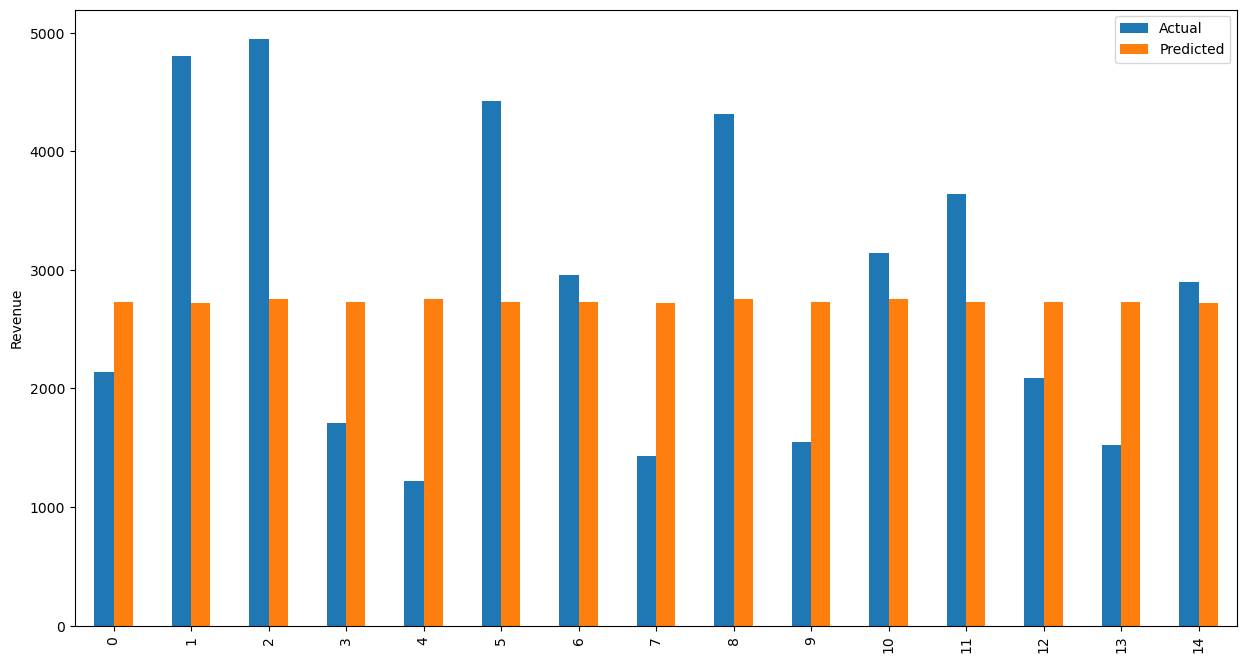

In [44]:
df1.plot(kind = 'bar', figsize = (15, 8))
plt.ylabel('Revenue')
plt.show()

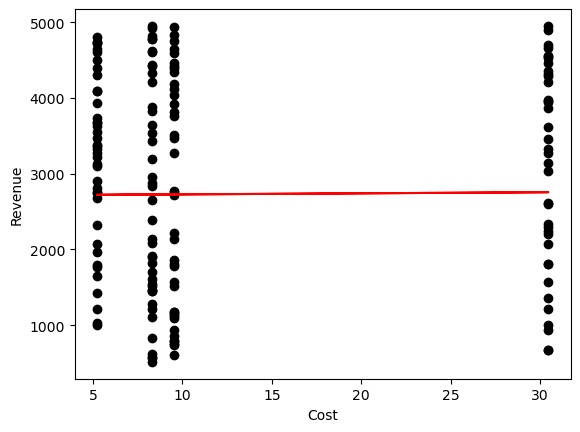

In [45]:
plt.scatter(Xtest, ytest, color = 'black')
plt.plot(Xtest, y_predict, color = 'red')
plt.ylabel('Revenue')
plt.xlabel('Cost')
plt.show()